In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [2]:
df = pd.read_csv(
    'files/NYPD_full.csv', 
    dtype={'CMPLNT_NUM': 'str'},
    on_bad_lines='error',
    low_memory=False,
    parse_dates={
        'CMPLNT_FR': ['CMPLNT_FR_TM', 'CMPLNT_FR_DT'], 
        'CMPLNT_TO': ['CMPLNT_TO_TM', 'CMPLNT_TO_DT'], 
        'RP_DT': ['RPT_DT']
    }
)
for t in ['CMPLNT_FR', 'CMPLNT_TO']:
    df[t] = pd.to_datetime(df[t], format='%H:%M:%S %m/%d/%Y', errors='coerce')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(7)

,CMPLNT_FR,CMPLNT_TO,RP_DT,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2018-03-29 20:30:00,NaT,2018-03-30,506547392,32.0,351,CRIMINAL MISCHIEF & RELATED OF,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,PARKING LOT/GARAGE (PUBLIC),N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1000565.0,234704.0,NaN,NaN,NaN,NaN,40.810877,-73.941064,"(40.810877241, -73.941064151)",PATROL BORO MAN NORTH,NaN,25-44,WHITE,F
1,2018-02-06 23:15:00,NaT,2018-02-07,629632833,52.0,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BRONX,INSIDE,DEPARTMENT STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1009690.0,257590.0,45-64,BLACK,F,NaN,40.873671,-73.908014,"(40.873671035, -73.908013649)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D
2,2018-11-21 00:15:00,2018-11-21 00:20:00,2018-11-21,787203902,75.0,341,PETIT LARCENY,321.0,"LARCENY,PETIT FROM AUTO",COMPLETED,MISDEMEANOR,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1016034.0,176756.0,25-44,WHITE HISPANIC,F,NaN,40.651782,-73.885457,"(40.651782232, -73.885456761)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D
3,2018-06-09 21:42:00,2018-06-09 21:43:00,2018-06-10,280364018,10.0,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,985717.0,215911.0,25-44,WHITE HISPANIC,M,NaN,40.759310,-73.994706,"(40.759310399, -73.994706072)",PATROL BORO MAN SOUTH,NaN,18-24,WHITE HISPANIC,F
4,2018-11-10 19:40:00,2018-11-10 19:45:00,2018-11-10,985800320,19.0,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,CHAIN STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,992359.0,217816.0,<18,BLACK HISPANIC,F,NaN,40.764536,-73.970728,"(40.764535539, -73.970728388)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,D
5,2018-03-12 11:48:00,NaT,2018-03-12,777641183,25.0,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,MANHATTAN,NaN,TRANSIT - NYC SUBWAY,N.Y. TRANSIT POLICE,1.0,NaN,NaN,NaN,1001575.0,232339.0,NaN,NaN,NaN,4.0,40.804384,-73.937422,"(40.804384046, -73.937421669)",PATROL BORO MAN NORTH,125 STREET,UNKNOWN,UNKNOWN,E
6,2013-04-07 16:00:00,NaT,2013-04-07,803743247,103.0,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1039793.0,195661.0,NaN,NaN,NaN,NaN,40.703555,-73.799677,"(40.703554914, -73.799677386)",PATROL BORO QUEENS SOUTH,NaN,NaN,UNKNOWN,E


In [3]:
times = df[['CMPLNT_FR', 'CMPLNT_TO', 'RP_DT']]
times.head(6)

,CMPLNT_FR,CMPLNT_TO,RP_DT
0,2018-03-29 20:30:00,NaT,2018-03-30
1,2018-02-06 23:15:00,NaT,2018-02-07
2,2018-11-21 00:15:00,2018-11-21 00:20:00,2018-11-21
3,2018-06-09 21:42:00,2018-06-09 21:43:00,2018-06-10
4,2018-11-10 19:40:00,2018-11-10 19:45:00,2018-11-10
5,2018-03-12 11:48:00,NaT,2018-03-12


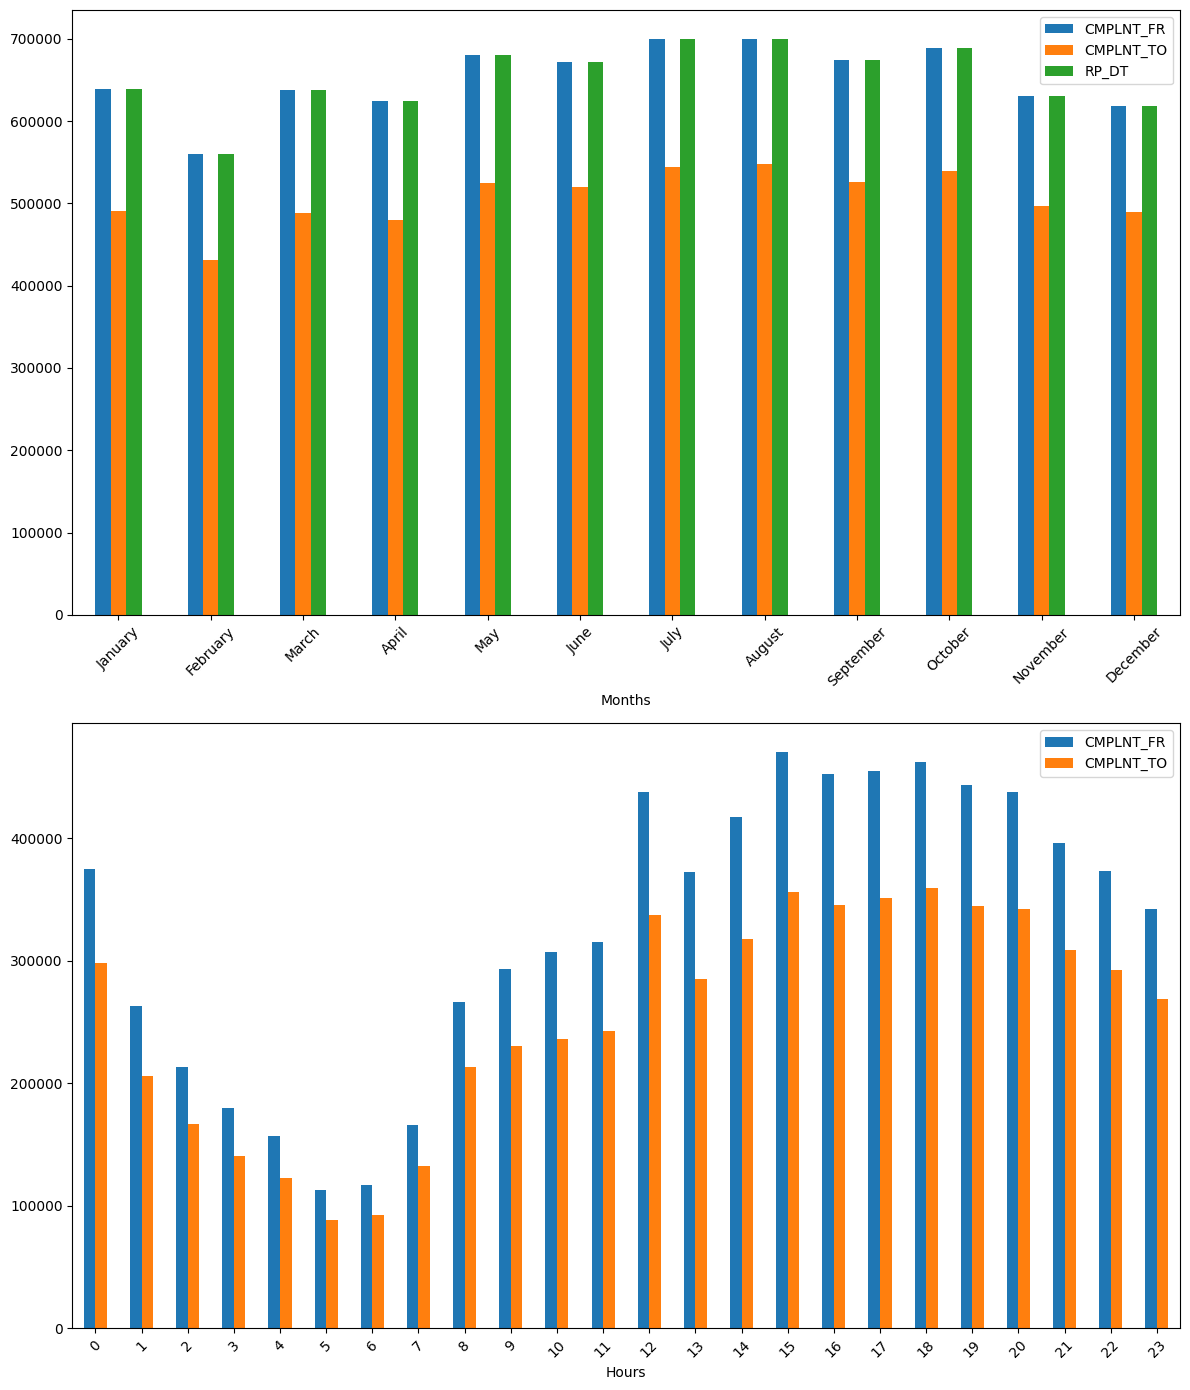

In [4]:
fig = plt.figure(figsize=(12, 14))

months = fig.add_subplot(211)
times[['CMPLNT_FR', 'CMPLNT_TO', 'RP_DT']].groupby(times['CMPLNT_FR'].dt.month).count().plot(
    ax=months, 
    kind='bar', 
    rot=45,
    xlabel='Months'
)
labels = [calendar.month_name[int(float(item.get_text()))] for item in months.get_xticklabels()]
months.set_xticklabels(labels)

hours = fig.add_subplot(212)
times[['CMPLNT_FR', 'CMPLNT_TO']].groupby(times['CMPLNT_FR'].dt.hour).count().plot(
    ax=hours, 
    kind='bar', 
    rot=45,
    xlabel='Hours'
)
labels = [int(float(item.get_text())) for item in hours.get_xticklabels()]
hours.set_xticklabels(labels)

fig.tight_layout()
plt.show()

In [6]:
time = pd.DataFrame({
    'CMPLNT_RP_DIFF': (times['CMPLNT_FR'] - times['RP_DT']).abs(),
    'CMPLNT_FROM_TO_DIFF': (times['CMPLNT_FR'] - times['CMPLNT_TO']).abs()
})
time.describe()

,CMPLNT_RP_DIFF,CMPLNT_FROM_TO_DIFF
count,7824663,6078136
mean,15 days 05:49:22.047878482,8 days 21:01:52.475686459
std,238 days 23:43:41.178183368,192 days 03:28:42.741700290
min,0 days 00:00:00,0 days 00:00:00
25%,0 days 07:00:00,0 days 00:05:00
50%,0 days 14:30:00,0 days 00:19:00
75%,0 days 21:00:00,0 days 04:00:00
max,40208 days 15:00:00,39960 days 10:00:00


In [7]:
[year for year in sorted(df['CMPLNT_FR'].dt.year.unique()) if year < 1970]

[1912.0,
 1918.0,
 1948.0,
 1957.0,
 1968.0,
 1900.0,
 1905.0,
 1906.0,
 1908.0,
 1909.0,
 1910.0,
 1911.0,
 1913.0,
 1914.0,
 1915.0,
 1916.0,
 1917.0,
 1919.0,
 1920.0,
 1921.0,
 1922.0,
 1928.0,
 1929.0,
 1930.0,
 1938.0,
 1940.0,
 1941.0,
 1942.0,
 1945.0,
 1946.0,
 1947.0,
 1949.0,
 1950.0,
 1951.0,
 1954.0,
 1955.0,
 1956.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1969.0]